In [4]:
!pip install pandas scikit-learn

In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/iris")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/iris


In [43]:
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder

In [9]:
csv_files = [f for f in os.listdir(path) if f.endswith('.csv')]
iris_csv = csv_files[0]  # Choose the first CSV file

# Load the CSV into a DataFrame
df = pd.read_csv(os.path.join(path, iris_csv))

print(df.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [25]:
le = LabelEncoder()
df['Species_encoded'] = le.fit_transform(df['Species'])
np.unique(df['Species_encoded'])


array([0, 1, 2])

In [24]:
                  for i, species in enumerate(le.classes_):
    print(f"{species}: {i}")

Iris-setosa: 0
Iris-versicolor: 1
Iris-virginica: 2


In [35]:

df_onehot = pd.get_dummies(df, columns=['Species'])

df_onehot.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_encoded,Species_Iris-setosa,Species_Iris-versicolor,Species_Iris-virginica
0,1,5.1,3.5,1.4,0.2,0,True,False,False
1,2,4.9,3.0,1.4,0.2,0,True,False,False
2,3,4.7,3.2,1.3,0.2,0,True,False,False
3,4,4.6,3.1,1.5,0.2,0,True,False,False
4,5,5.0,3.6,1.4,0.2,0,True,False,False


In [34]:
np.unique(df['Species'])

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [33]:
  for i, species in enumerate(le.classes_):
    print(f"{species}: {i}")

Iris-setosa: 0
Iris-versicolor: 1
Iris-virginica: 2


In [40]:
def one_hot_encode(df, categorical_columns):
    return pd.get_dummies(df, columns=categorical_columns)
df_onehot = one_hot_encode(df, ['Species'])


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_encoded,Species_Iris-setosa,Species_Iris-versicolor,Species_Iris-virginica
0,1,5.1,3.5,1.4,0.2,0,True,False,False
1,2,4.9,3.0,1.4,0.2,0,True,False,False
2,3,4.7,3.2,1.3,0.2,0,True,False,False
3,4,4.6,3.1,1.5,0.2,0,True,False,False
4,5,5.0,3.6,1.4,0.2,0,True,False,False


In [46]:
onehot = pd.get_dummies(df['Species'])

onehot_str = onehot.apply(lambda row: ''.join(row.astype(str)), axis=1)

df['Species_onehot_str'] = onehot_str

print(df[['Species', 'Species_onehot_str']].head())

       Species Species_onehot_str
0  Iris-setosa     TrueFalseFalse
1  Iris-setosa     TrueFalseFalse
2  Iris-setosa     TrueFalseFalse
3  Iris-setosa     TrueFalseFalse
4  Iris-setosa     TrueFalseFalse


In [54]:
import kagglehub
import pandas as pd
import os

path = kagglehub.dataset_download("uciml/iris")
csv_file = [f for f in os.listdir(path) if f.endswith('.csv')][0]
df = pd.read_csv(os.path.join(path, csv_file))

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

y = pd.get_dummies(df["Species"])
X = df.drop("Species", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [58]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(y_train.shape[1], activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=8, validation_split=0.1)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.3921 - loss: 0.9839 - val_accuracy: 0.1667 - val_loss: 1.0281
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3973 - loss: 0.9256 - val_accuracy: 0.5000 - val_loss: 0.9766
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5380 - loss: 0.8741 - val_accuracy: 0.5833 - val_loss: 0.9300
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6285 - loss: 0.8434 - val_accuracy: 0.7500 - val_loss: 0.8908
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8254 - loss: 0.7074 - val_accuracy: 0.7500 - val_loss: 0.8530
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7997 - loss: 0.6971 - val_accuracy: 0.7500 - val_loss: 0.8215
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7999 - loss: 0.6892 - val_accuracy: 0.7500 - val_loss: 0.7903
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7979 - loss: 0.6182 - val_accuracy: 0.7500 - val_loss: 0.7605
Ep

In [59]:
import numpy as np

y_pred_prob = model.predict(X_test)
threshold = 0.5
y_pred = (y_pred_prob > threshold).astype(int)
y_pred_class = np.argmax(y_pred_prob, axis=1)
y_true_class = np.argmax(y_test.values, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


In [64]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_true_class, y_pred_class)
print( cm)


[[10  0  0]
 [ 1  5  3]
 [ 0  0 11]]


In [63]:
print("Classification Report:\n", classification_report(y_true_class, y_pred_class))

Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.56      0.71         9
           2       0.79      1.00      0.88        11

    accuracy                           0.87        30
   macro avg       0.90      0.85      0.85        30
weighted avg       0.89      0.87      0.85        30



In [61]:

confusion_indices = np.max(y_pred_prob, axis=1) < 0.7
print("Confused samples indices:", np.where(confusion_indices)[0])

Confused samples indices: [ 0  2  3  4  6  7  8  9 10 15 16 17 18 19 21 23 25 26]


In [65]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Load MNIST from TensorFlow datasets
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize
x_train, x_test = x_train / 255.0, x_test / 255.0

# Flatten images for dense layers
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

# One-hot encode targets
y_train_oh = tf.keras.utils.to_categorical(y_train, 10)
y_test_oh = tf.keras.utils.to_categorical(y_test, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [66]:
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(784,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train_oh, epochs=5, batch_size=128, validation_split=0.1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.8146 - loss: 0.6455 - val_accuracy: 0.9588 - val_loss: 0.1451
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9552 - loss: 0.1545 - val_accuracy: 0.9702 - val_loss: 0.1040
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9695 - loss: 0.1015 - val_accuracy: 0.9727 - val_loss: 0.0892
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9774 - loss: 0.0756 - val_accuracy: 0.9697 - val_loss: 0.0948
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.9815 - loss: 0.0603 - val_accuracy: 0.9758 - val_loss: 0.0813


In [74]:
import numpy as np

y_pred_prob = model.predict(x_test)

y_pred_class = np.argmax(y_pred_prob, axis=1)
threshold = 0.5
confused = np.max(y_pred_prob, axis=1) < threshold
print("Indices of confused samples:", np.where(confused)[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Indices of confused samples: [   8  259 1107 1156 1272 1289 1328 1522 1609 1709 1941 1952 2004 2109
 2369 2414 2743 2995 3030 3117 3474 3490 3808 3818 3853 3926 3976 4007
 4065 4075 4116 4294 4443 4886 4966 5078 5734 6045 6625 7216 7434 8277
 8318 8339 8408 9500 9700 9733 9792]


In [75]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred_class)
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[ 971    1    0    2    1    0    3    1    1    0]
 [   0 1126    2    0    0    1    2    0    4    0]
 [   3    4 1002    6    1    0    3    3   10    0]
 [   0    0    6  990    0    4    0    3    6    1]
 [   2    0    2    1  960    0    5    2    2    8]
 [   2    1    0    8    2  863    6    1    8    1]
 [   4    3    3    1    3    3  938    0    3    0]
 [   1    7    8    4    1    0    0  998    0    9]
 [   1    0    2    8    3    5    3    2  948    2]
 [   4    4    0    7   15    5    0    4    7  963]]


In [72]:
  print("Classification Report:\n", classification_report(y_test, y_pred_class))

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.98      0.99      0.99      1135
           2       0.98      0.97      0.97      1032
           3       0.96      0.98      0.97      1010
           4       0.97      0.98      0.98       982
           5       0.98      0.97      0.97       892
           6       0.98      0.98      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.96      0.97      0.97       974
           9       0.98      0.95      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



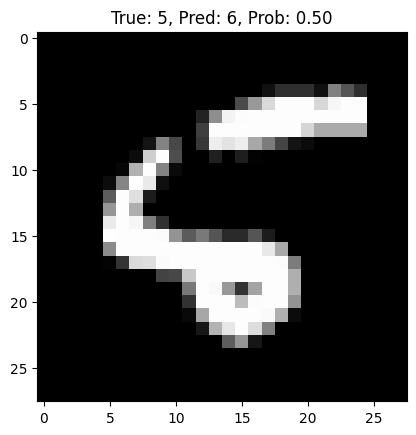

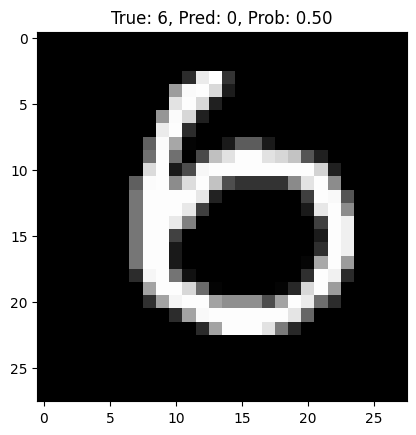

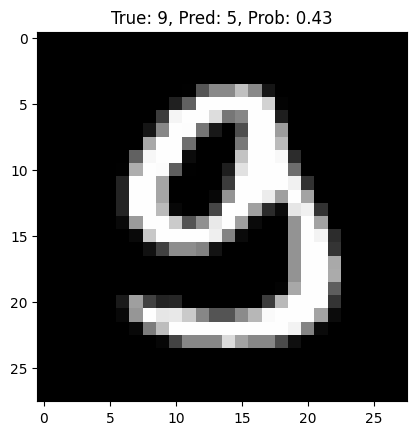

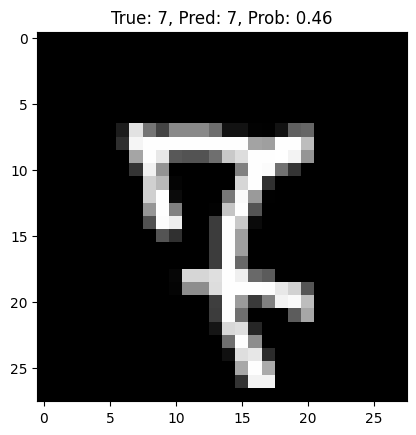

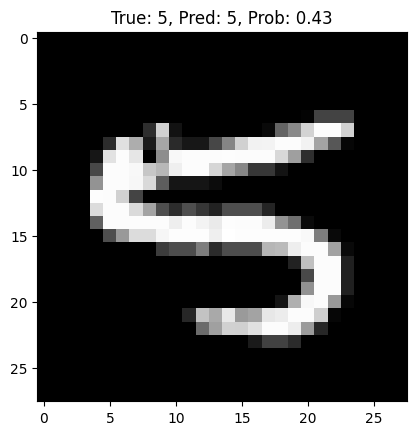

In [79]:
import matplotlib.pyplot as plt

# Plot a few confused samples
for idx in np.where(confused)[0][:5]:
    plt.imshow(x_test[idx].reshape(28,28), cmap='gray')
    plt.title(f"True: {y_test[idx]}, Pred: {y_pred_class[idx]}, Prob: {np.max(y_pred_prob[idx]):.2f}")
    plt.show()

In [76]:

mask_05 = np.max(y_pred_prob, axis=1) < 0.5
mask_07 = np.max(y_pred_prob, axis=1) < 0.7

In [77]:
mask_05

array([False, False, False, ..., False, False, False])

In [78]:
mask_07

array([False, False, False, ..., False, False, False])